<a href="https://colab.research.google.com/github/iamviji/project/blob/master/Final/TensorflowBinary_BPSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy 
import time
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior ()
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
SNR_BEGIN = 0
SNR_END = 10
SNR_STEP_SIZE = 0.5
NUM_OF_INPUT_MESSAGE = 1000
bler_per_iter_uncoded_commpy_psk_2 = [0.521, 0.473, 0.436, 0.37,  0.304, 0.259, 0.187, 0.138, 0.098, 0.098, 0.052, 0.028, 0.012, 0.011, 0.009, 0.002, 0.0,  0.001, 0.,    0.0]
bler_per_iter_uncoded_itpp_psk_2 = [0.518, 0.478, 0.415, 0.355, 0.305, 0.227, 0.177, 0.149, 0.11,  0.075, 0.055, 0.023, 0.014, 0.014, 0.015, 0.001, 0.003, 0.001, 0.,    0. ]
bler_per_iter_uncoded_commpy_psk_4 = [0.815, 0.793, 0.75,  0.714, 0.64,  0.639, 0.526, 0.49,  0.433, 0.371, 0.335, 0.236, 0.204, 0.154, 0.129, 0.08,  0.063, 0.046, 0.023, 0.018]
bler_per_iter_uncoded_itpp_psk_4 = [0.814, 0.767, 0.729, 0.702, 0.66,  0.616, 0.563, 0.511, 0.442, 0.4,   0.294, 0.277, 0.228, 0.17,  0.114, 0.087, 0.05,  0.037, 0.022, 0.017]
bler_per_iter_ldpc_itpp_psk_4 = [0.584, 0.488, 0.404, 0.332, 0.218, 0.151, 0.097, 0.058, 0.041, 0.024, 0.007, 0.004, 0.002, 0.001, 0.001, 0.,    0.,    0.,    0.,    0.,   ]
bler_per_iter_ham_itpp_psk_4 = [0.51, 0.479, 0.419, 0.333, 0.313, 0.247, 0.212, 0.132, 0.114, 0.093, 0.042, 0.027, 0.024, 0.016, 0.006, 0.005, 0.003, 0.002, 0.,    0.  ]
bler_per_iter_uncoded_itpp_psk_8 = [0.921, 0.917, 0.912, 0.867, 0.86,  0.857, 0.826, 0.808, 0.77,  0.737, 0.704, 0.657, 0.608, 0.6,   0.547, 0.487, 0.426, 0.361, 0.323, 0.293]
bler_per_iter_uncoded_commpy_psk_8 = [0.923, 0.912, 0.891, 0.888, 0.874, 0.851, 0.804, 0.779, 0.758, 0.736, 0.715, 0.643, 0.614, 0.557, 0.542, 0.503, 0.431, 0.386, 0.331, 0.289]

ber_per_iter_uncoded_itpp_psk_2 = [0.07933333, 0.067, 0.058, 0.04811111, 0.039, 0.02911111, 0.02211111, 0.01833333, 0.01266667, 0.00866667, 0.00622222, 0.00255556, 0.00166667, 0.00155556, 0.00166667, 0.00011111, 0.00033333, 0.00011111, 0., 0.]
ber_per_iter_uncoded_commpy_psk_2 = [0.07955556, 0.07055556, 0.05344444, 0.04477778, 0.03644444, 0.02888889, 0.02055556, 0.01955556, 0.01033333, 0.00855556, 0.00522222, 0.004, 0.00188889, 0.00155556, 0.00055556, 0.00066667, 0.00022222, 0.00011111, 0., 0.]
ber_per_iter_uncoded_itpp_psk_4 = [0.1559, 0.1421, 0.1248, 0.1137, 0.1031, 0.0924, 0.0802, 0.0684, 0.055,  0.0499, 0.0348, 0.0336, 0.0257, 0.0185, 0.0121, 0.0092, 0.0054, 0.0037, 0.0022, 0.0017]
ber_per_iter_uncoded_commpy_psk_4 = [0.2137, 0.1943, 0.1773, 0.1624, 0.1473, 0.1355, 0.1105, 0.0984, 0.0873, 0.0686, 0.0573, 0.0454, 0.0356, 0.024,  0.0214, 0.0142, 0.0111, 0.0055, 0.0038, 0.002]
ber_per_iter_uncoded_itpp_psk_8 = [0.24566667, 0.23411111, 0.21455556, 0.19888889, 0.188, 0.184, 0.16355556, 0.15655556, 0.13777778, 0.12966667, 0.115, 0.10622222, 0.09211111, 0.088, 0.07622222, 0.06855556, 0.05677778, 0.04755556, 0.04188889, 0.03577778]
ber_per_iter_uncoded_commpy_psk_8 = [0.32577778, 0.31533333, 0.30455556, 0.29644444, 0.27955556, 0.266, 0.24677778, 0.23411111, 0.22088889, 0.209,      0.19577778, 0.17544444, 0.15844444, 0.13966667, 0.13533333, 0.12077778, 0.10211111, 0.09066667, 0.07544444, 0.06355556]
ber_per_iter_ldpc_itpp_psk_4 = [1.25444444e-01, 1.19111111e-01, 9.48888889e-02, 7.54444444e-02, 5.50000000e-02, 3.86666667e-02, 2.51111111e-02, 1.53333333e-02, 1.04444444e-02, 1.22222222e-03, 2.88888889e-03, 0.00000000e+00, 1.11111111e-04, 3.33333333e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]


import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions
from scipy.special import erfc
import math
#ref : https://core.ac.uk/download/pdf/235049678.pdf
EbN0dBs = np.arange(start=0,stop = 10.5, step = .5)
PSK_2_BER_theory = 0.5*erfc(np.sqrt(10**(EbN0dBs/10)))
M=4
#QAM_BER_theory = 2*(1-np.sqrt(1/M))*erfc(np.sqrt(10**(EbN0dBs/10)))
QAM_BER_theory = erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
PSK_4_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
M=8
PSK_8_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
QAM_8_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
M=16
PSK_16_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))
#QAM_16_BER_theory = 2*erfc(np.sqrt(math.log2(M)*3/(2*(M-1)))*np.sqrt(10**(EbN0dBs/10)))
QAM_16_BER_theory = (3.0/2)*erfc(np.sqrt((4.0/10))*np.sqrt(10**(EbN0dBs/10)))
                     #(3.0/2)*special.erfc(np.sqrt((4.0/10)*10.**(ebno/10)))
M=32
PSK_32_BER_theory = erfc(math.sin(math.pi/M)*np.sqrt(10**(EbN0dBs/10)))


In [3]:
# Helper Function
def bits2int(a, axis=-1):
    return numpy.right_shift(numpy.packbits(a, axis=axis), 8 - a.shape[axis]).squeeze()


def row_bits2int(arr):
    n = arr.shape[1]  # number of columns
    # shift the bits of the first column to the left by n - 1
    a = arr[:, 0] << n - 1  

    for j in range(1, n):
        # "overlay" with the shifted bits of the next column
        a |= arr[:, j] << n - 1 - j  
    return a

def Snr2Sigma(snr):
  sigma = 10 ** (- snr / 20)
  return sigma

def timer_update(i,current,time_tot,tic_incr=500):
    last = current
    current = time.time()
    t_diff = current-last
    print('SNR: {:04.3f} - Iter: {} - Last {} iterations took {:03.2f}s'.format(snr,i+1,tic_incr,t_diff))
    return time_tot + t_diff


def GetBerBler (input_message_binary1, input_message_binary2):
  diff = abs(input_message_binary1 - input_message_binary2)
  field_sum = numpy.sum (diff, axis=1)
  field_sum = numpy.reshape (field_sum, (-1,1))
  ber = numpy.sum(field_sum)/(input_message_binary1.shape[0]*input_message_binary1.shape[1])
  field_non_zero_count = numpy.count_nonzero(field_sum != 0, axis=1)
  bler = numpy.sum(field_non_zero_count)/field_non_zero_count.shape[0]
  return ber, bler

def get_ber_bler_of_model (snr_list, encoder, decoder, input_binary, num_of_input_msg, input_message_length, channel_size, verbose=1):
  bler_per_iter_dl_tensor  = numpy.array(())
  ber_per_iter_dl_tensor  = numpy.array(())
  channel_out = []
  encoded_message = encoder.predict(input_binary)
  for snr in snr_list:
    total_bit_error = 0
    total_msg_error = 0    
    sigma = Snr2Sigma (snr)
    noised_message = encoded_message + numpy.random.normal(0, sigma, encoded_message.shape)
    for i in range (num_of_input_msg):
      noised_message[i] = encoded_message[i] + numpy.random.normal(0, sigma, [1,2*channel_size])
      channel_out.append(noised_message[i])
    decoded_message = decoder.predict(noised_message)
    decoded_message = numpy.around(decoded_message).astype(int)
    ber,bler = GetBerBler (input_binary, decoded_message)
    print('SNR: {:04.3f}:-> BLER: {:03.3f} BER: {:03.3f}'.format(snr,bler,ber))
    bler_per_iter_dl_tensor = numpy.append(bler_per_iter_dl_tensor, bler)
    ber_per_iter_dl_tensor = numpy.append(ber_per_iter_dl_tensor, ber)
  return ber_per_iter_dl_tensor, bler_per_iter_dl_tensor, channel_out

In [11]:
# ARCH 2 : 18-36-18
NUM_OF_INPUT_MESSAGE = 1000
channel_size = 1
input_message_length = 1

print ("input_message_length=", input_message_length, "channel_size", channel_size)

input_message_x = tf.placeholder("float32", [None, input_message_length], name="input_message_x")
awgn_noise_std_dev_x = tf.placeholder("float32", name ="awgn_noise_std_dev")
input_channel_x = tf.placeholder("float32", [None, 2 * channel_size], name="input_channel_x")

weights = {
  "encoder_l1" : tf.Variable (tf.random_uniform([input_message_length, 2 * channel_size], -1, 1), name="encoder_l1_weights"),
  "decoder_l1" : tf.Variable (tf.random_uniform([2 * channel_size, input_message_length], -1, 1), name="decoder_l1_weights"),
}

biases = {
  "encoder_l1" : tf.Variable (tf.random_uniform([2 * channel_size], -1,1), name="encoder_l1_bias"),
  "decoder_l1" : tf.Variable (tf.random_uniform([input_message_length], -1,1), name="decoder_l1_bias"),
}

def dl_encoder (x):
  layer_1 = tf.nn.tanh (tf.matmul(x, weights['encoder_l1']) + biases['encoder_l1'])
  #layer_2 = tf.nn.tanh (tf.matmul(layer_1, weights['encoder_l2']) + biases['encoder_l2'])
  #layer_2 = tf.round(layer_1)
  layer_2 =  layer_1 / tf.sqrt(tf.reduce_mean(tf.square(layer_1)))
  #layer_2 =  tf.nn.relu(layer_1)
  return layer_2

def dl_decoder (x):
  layer_2 = tf.nn.sigmoid (tf.matmul(x, weights['decoder_l1']) + biases['decoder_l1'])
  return layer_2

def awgn_layer(x):
  awgn_noise = tf.random.normal(tf.shape(x), stddev=awgn_noise_std_dev_x,  name="awgn_noise")
  awgn_channel_output = tf.add(x, awgn_noise, name ="x_and_noise")
  return awgn_channel_output


dl_encoder_output = dl_encoder(input_message_x)
dl_decoder_input = awgn_layer(dl_encoder_output)
#awgn_noise = tf.random.normal(tf.shape(dl_encoder_output), stddev=awgn_noise_std_dev,  name="awgn_noise")
#dl_decoder_input = tf.add(dl_encoder_output, awgn_noise, name ="x_and_noise")
dl_decoder_output = dl_decoder (dl_decoder_input)
dl_decoder_only_output = dl_decoder(input_channel_x)


loss1 = tf.reduce_mean (-1 * (input_message_x*tf.log(dl_decoder_output) + (1 - input_message_x)*tf.log(1 - dl_decoder_output) ))
#loss1 = tf.reduce_mean (tf.sqrt(tf.reduce_sum(tf.square(input_message_x-dl_decoder_output), axis=1)))
lr = tf.placeholder(dtype=tf.float32,shape=[])
opt = tf.train.AdamOptimizer(learning_rate=lr).minimize (loss1)


awgn_channel_input = tf.compat.v1.placeholder(tf.float64, [2*channel_size])
awgn_noise_std_dev = tf.placeholder(tf.float64)
awgn_noise = tf.random.normal(tf.shape(awgn_channel_input), stddev=awgn_noise_std_dev, dtype=tf.dtypes.float64)
awgn_channel_output = tf.add(awgn_channel_input, awgn_noise)

input_message_length= 1 channel_size 1


In [12]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE*10,input_message_length))
print (training_input_message)
print (len(training_input_message))

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
10000


In [13]:
batch_size = 400


# Training
train_init = tf.global_variables_initializer ()
train_sess = tf.Session ()

epochs = 50
outer_ephocs = 1
num_of_batches = len(training_input_message) / batch_size
display_step = 400
print ("batch_size:", batch_size, "num_of_batcches:", num_of_batches)
train_sess.run(train_init)
l = 0
lrate = 0.05
i = 0
for oe in range(outer_ephocs):
  for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
    sigma = 1.0*Snr2Sigma (snr)
    print ("Training for SNR=", snr, " sigma=", sigma) 
    for e in range(epochs):
      for j in range (int(num_of_batches)):
        i = i + 1
        k = e * epochs + j
        x_train_batch = training_input_message [j*batch_size:(j+1)*batch_size]
        x_train_batch_float = x_train_batch.astype("float32")
        _, l = train_sess.run ([opt, loss1], feed_dict={input_message_x:x_train_batch_float, awgn_noise_std_dev_x:sigma, lr:lrate})
        if (l < 0.5): lrate = 0.01
        if (l < 0.25): lrate = 0.0001
        if (l < 0.1): lrate = 0.00001
        if k % display_step == 0:
          print('Step %i: Minibatch Loss: %f' % (i, l))

batch_size: 400 num_of_batcches: 25.0
Training for SNR= 0.0  sigma= 1.0
Step 1: Minibatch Loss: 0.654891
Step 201: Minibatch Loss: 0.221907
Step 401: Minibatch Loss: 0.213302
Step 601: Minibatch Loss: 0.195064
Step 801: Minibatch Loss: 0.194211
Step 1001: Minibatch Loss: 0.211602
Step 1201: Minibatch Loss: 0.219287
Training for SNR= 0.5  sigma= 0.9440608762859234
Step 1251: Minibatch Loss: 0.180584
Step 1451: Minibatch Loss: 0.187886
Step 1651: Minibatch Loss: 0.166813
Step 1851: Minibatch Loss: 0.180446
Step 2051: Minibatch Loss: 0.154778
Step 2251: Minibatch Loss: 0.179853
Step 2451: Minibatch Loss: 0.178100
Training for SNR= 1.0  sigma= 0.8912509381337456
Step 2501: Minibatch Loss: 0.164464
Step 2701: Minibatch Loss: 0.153610
Step 2901: Minibatch Loss: 0.144167
Step 3101: Minibatch Loss: 0.138589
Step 3301: Minibatch Loss: 0.165918
Step 3501: Minibatch Loss: 0.165994
Step 3701: Minibatch Loss: 0.167109
Training for SNR= 1.5  sigma= 0.8413951416451951
Step 3751: Minibatch Loss: 0.156

In [28]:
# Here I am using trained model
NUM_OF_INPUT_MESSAGE_BER = NUM_OF_INPUT_MESSAGE 
output_display_counter = NUM_OF_INPUT_MESSAGE/4
ber_per_iter_dl_tensor  = numpy.array(())
bler_per_iter_dl_tensor  = numpy.array(())
times_per_iter_dl_tensor = numpy.array(())

channel_in = []
channel_out = []
for snr in numpy.arange (0, 10, SNR_STEP_SIZE):
  total_bit_error = 0
  total_msg_error = 0
  total_time = 0
  current_time = time.time()
  sigma = Snr2Sigma (snr)
  for i in range (NUM_OF_INPUT_MESSAGE_BER):
    input_message_xx = training_input_message [i:i+1]
    input_message_xx_float = input_message_xx.astype("float32")
    encoded_message = train_sess.run ([dl_encoder_output], feed_dict={input_message_x:input_message_xx_float})
    #print (encoded_message[0][0])
    channel_in.append(encoded_message[0][0])
    #print (encoded_message[0][0])
    awgn_channel_output_message = train_sess.run ([awgn_channel_output], feed_dict={awgn_noise_std_dev:sigma, awgn_channel_input:encoded_message[0][0]})
    channel_out.append(awgn_channel_output_message[0]) 
    #print (awgn_channel_output_message[0])
    decoded_message = train_sess.run ([dl_decoder_only_output], feed_dict={input_channel_x:awgn_channel_output_message})
    #print ("input", input_message[i])
    decoded_message = numpy.around(decoded_message[0][0]).astype(int)
    #print ("output", decoded_message)
    diffc = abs(decoded_message-training_input_message[i]).sum()
    total_bit_error = total_bit_error + diffc
    if diffc != 0 :
      total_msg_error = total_msg_error + 1
    if (i+1) % output_display_counter == 0:
      total_time = timer_update(i, current_time,total_time, output_display_counter)
  bler = float(total_msg_error)/NUM_OF_INPUT_MESSAGE_BER
  ber = float(total_bit_error)/(NUM_OF_INPUT_MESSAGE_BER*input_message_length)
  print('SNR: {:04.3f}:\n -> BLER: {:03.4f} BER: {:03.4f}\n'.format(snr,bler,ber,total_time))
  ber_per_iter_dl_tensor=numpy.append(ber_per_iter_dl_tensor ,ber)
  bler_per_iter_dl_tensor=numpy.append(bler_per_iter_dl_tensor ,bler)


SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 0.26s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 0.51s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 0.78s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 1.04s
SNR: 0.000:
 -> BLER: 0.0740 BER: 0.0740

SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 0.28s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 0.54s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 0.81s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 1.06s
SNR: 0.500:
 -> BLER: 0.0690 BER: 0.0690

SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 0.26s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 0.52s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 0.77s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 1.03s
SNR: 1.000:
 -> BLER: 0.0520 BER: 0.0520

SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 0.26s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 0.52s
SNR: 1.500 - Iter: 750 - Last 250.0 iterations took 0.79s
S

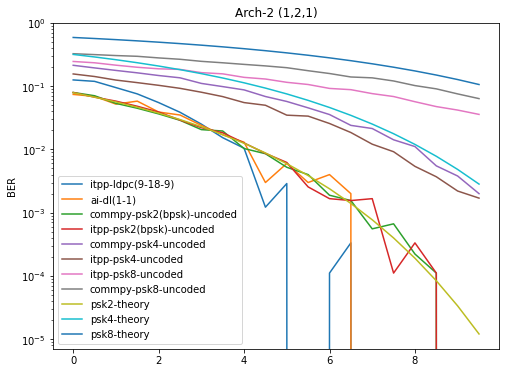

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(1-1)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

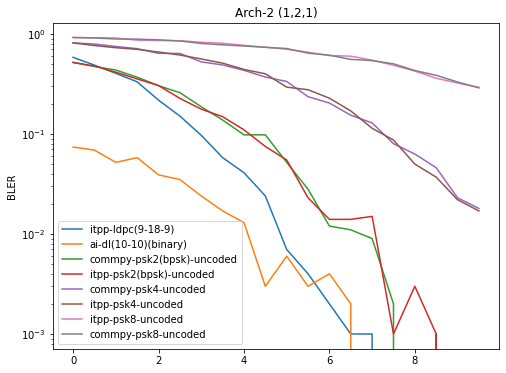

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor,'', label="ai-dl(10-10)(binary)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

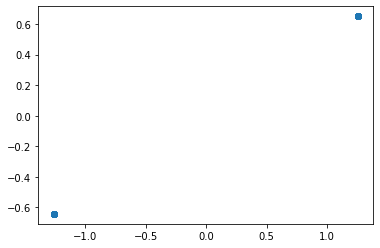

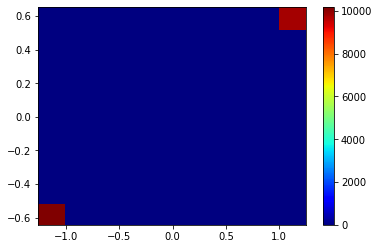

In [34]:
import matplotlib.pyplot as plt
channel_in_array = numpy.transpose(channel_in)

for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

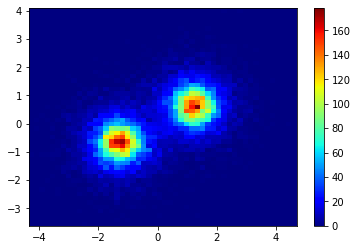

In [35]:
channel_out_array = numpy.transpose(channel_out)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

1.4140372


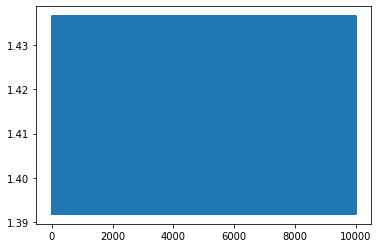

In [47]:
input_message_xx_float = training_input_message.astype("float32")
encoded_message = train_sess.run ([dl_encoder_output], feed_dict={input_message_x:input_message_xx_float})
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message[0]), axis=1))
plt.plot(x)
print (numpy.mean(x))

In [58]:
# ARCH 2 : 18-36-18
NUM_OF_INPUT_MESSAGE = 1000
channel_size = 10
input_message_length = 10

print ("input_message_length=", input_message_length, "channel_size", channel_size)

input_message_x = tf.placeholder("float32", [None, input_message_length], name="input_message_x")
awgn_noise_std_dev_x = tf.placeholder("float32", name ="awgn_noise_std_dev")
input_channel_x = tf.placeholder("float32", [None, 2 * channel_size], name="input_channel_x")

weights = {
  "encoder_l1" : tf.Variable (tf.random_uniform([input_message_length, 2 * channel_size], -1, 1), name="encoder_l1_weights"),
  "decoder_l1" : tf.Variable (tf.random_uniform([2 * channel_size, input_message_length], -1, 1), name="decoder_l1_weights"),
}

biases = {
  "encoder_l1" : tf.Variable (tf.random_uniform([2 * channel_size], -1,1), name="encoder_l1_bias"),
  "decoder_l1" : tf.Variable (tf.random_uniform([input_message_length], -1,1), name="decoder_l1_bias"),
}

def dl_encoder (x):
  layer_1 = tf.nn.tanh (tf.matmul(x, weights['encoder_l1']) + biases['encoder_l1'])
  #layer_2 = tf.nn.tanh (tf.matmul(layer_1, weights['encoder_l2']) + biases['encoder_l2'])
  #layer_2 = tf.round(layer_1)
  layer_2 =  layer_1 / tf.sqrt(tf.reduce_mean(tf.square(layer_1)))
  #layer_2 =  tf.nn.relu(layer_1)
  return layer_2

def dl_decoder (x):
  layer_2 = tf.nn.sigmoid (tf.matmul(x, weights['decoder_l1']) + biases['decoder_l1'])
  return layer_2

def awgn_layer(x):
  awgn_noise = tf.random.normal(tf.shape(x), stddev=awgn_noise_std_dev_x,  name="awgn_noise")
  awgn_channel_output = tf.add(x, awgn_noise, name ="x_and_noise")
  return awgn_channel_output


dl_encoder_output = dl_encoder(input_message_x)
dl_decoder_input = awgn_layer(dl_encoder_output)
#awgn_noise = tf.random.normal(tf.shape(dl_encoder_output), stddev=awgn_noise_std_dev,  name="awgn_noise")
#dl_decoder_input = tf.add(dl_encoder_output, awgn_noise, name ="x_and_noise")
dl_decoder_output = dl_decoder (dl_decoder_input)
dl_decoder_only_output = dl_decoder(input_channel_x)


loss1 = tf.reduce_mean (-1 * (input_message_x*tf.log(dl_decoder_output) + (1 - input_message_x)*tf.log(1 - dl_decoder_output) ))
#loss1 = tf.reduce_mean (tf.sqrt(tf.reduce_sum(tf.square(input_message_x-dl_decoder_output), axis=1)))
lr = tf.placeholder(dtype=tf.float32,shape=[])
opt = tf.train.AdamOptimizer(learning_rate=lr).minimize (loss1)


awgn_channel_input = tf.compat.v1.placeholder(tf.float64, [2*channel_size])
awgn_noise_std_dev = tf.placeholder(tf.float64)
awgn_noise = tf.random.normal(tf.shape(awgn_channel_input), stddev=awgn_noise_std_dev, dtype=tf.dtypes.float64)
awgn_channel_output = tf.add(awgn_channel_input, awgn_noise)

input_message_length= 10 channel_size 10


In [49]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE*10,input_message_length))
print (training_input_message)
print (len(training_input_message))

[[0 1 1 ... 0 0 1]
 [1 1 1 ... 1 0 1]
 [0 0 1 ... 1 1 1]
 ...
 [1 1 0 ... 0 0 1]
 [1 1 1 ... 0 1 1]
 [1 0 1 ... 1 1 0]]
10000


In [59]:
batch_size = 500


# Training
train_init = tf.global_variables_initializer ()
train_sess = tf.Session ()

epochs = 30
outer_ephocs = 1
num_of_batches = len(training_input_message) / batch_size
display_step = 400
print ("batch_size:", batch_size, "num_of_batcches:", num_of_batches)
train_sess.run(train_init)
l = 0
lrate = 0.05
i = 0
for oe in range(outer_ephocs):
  for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
    sigma = 1.0*Snr2Sigma (snr)
    print ("Training for SNR=", snr, " sigma=", sigma) 
    for e in range(epochs):
      for j in range (int(num_of_batches)):
        i = i + 1
        k = e * epochs + j
        x_train_batch = training_input_message [j*batch_size:(j+1)*batch_size]
        x_train_batch_float = x_train_batch.astype("float32")
        _, l = train_sess.run ([opt, loss1], feed_dict={input_message_x:x_train_batch_float, awgn_noise_std_dev_x:sigma, lr:lrate})
        if (l < 0.5): lrate = 0.01
        if (l < 0.25): lrate = 0.0001
        if (l < 0.1): lrate = 0.00001
        if k % display_step == 0:
          print('Step %i: Minibatch Loss: %f' % (i, l))

batch_size: 500 num_of_batcches: 20.0
Training for SNR= 0.0  sigma= 1.0
Step 1: Minibatch Loss: 1.546034
Step 271: Minibatch Loss: 0.231586
Training for SNR= 0.5  sigma= 0.9440608762859234
Step 601: Minibatch Loss: 0.208177
Step 871: Minibatch Loss: 0.205382
Training for SNR= 1.0  sigma= 0.8912509381337456
Step 1201: Minibatch Loss: 0.179690
Step 1471: Minibatch Loss: 0.178523
Training for SNR= 1.5  sigma= 0.8413951416451951
Step 1801: Minibatch Loss: 0.159436
Step 2071: Minibatch Loss: 0.156202
Training for SNR= 2.0  sigma= 0.7943282347242815
Step 2401: Minibatch Loss: 0.145446
Step 2671: Minibatch Loss: 0.130045
Training for SNR= 2.5  sigma= 0.7498942093324559
Step 3001: Minibatch Loss: 0.121430
Step 3271: Minibatch Loss: 0.112245
Training for SNR= 3.0  sigma= 0.7079457843841379
Step 3601: Minibatch Loss: 0.107030
Step 3871: Minibatch Loss: 0.099508
Training for SNR= 3.5  sigma= 0.6683439175686147
Step 4201: Minibatch Loss: 0.090840
Step 4471: Minibatch Loss: 0.092099
Training for SN

In [60]:
# Here I am using trained model
NUM_OF_INPUT_MESSAGE_BER = NUM_OF_INPUT_MESSAGE 
output_display_counter = NUM_OF_INPUT_MESSAGE/4
ber_per_iter_dl_tensor  = numpy.array(())
bler_per_iter_dl_tensor  = numpy.array(())
times_per_iter_dl_tensor = numpy.array(())

channel_in = []
channel_out = []
for snr in numpy.arange (0, 10, SNR_STEP_SIZE):
  total_bit_error = 0
  total_msg_error = 0
  total_time = 0
  current_time = time.time()
  sigma = Snr2Sigma (snr)
  for i in range (NUM_OF_INPUT_MESSAGE_BER):
    input_message_xx = training_input_message [i:i+1]
    input_message_xx_float = input_message_xx.astype("float32")
    encoded_message = train_sess.run ([dl_encoder_output], feed_dict={input_message_x:input_message_xx_float})
    #print (encoded_message[0][0])
    channel_in.append(encoded_message[0][0])
    #print (encoded_message[0][0])
    awgn_channel_output_message = train_sess.run ([awgn_channel_output], feed_dict={awgn_noise_std_dev:sigma, awgn_channel_input:encoded_message[0][0]})
    channel_out.append(awgn_channel_output_message[0]) 
    #print (awgn_channel_output_message[0])
    decoded_message = train_sess.run ([dl_decoder_only_output], feed_dict={input_channel_x:awgn_channel_output_message})
    #print ("input", input_message[i])
    decoded_message = numpy.around(decoded_message[0][0]).astype(int)
    #print ("output", decoded_message)
    diffc = abs(decoded_message-training_input_message[i]).sum()
    total_bit_error = total_bit_error + diffc
    if diffc != 0 :
      total_msg_error = total_msg_error + 1
    if (i+1) % output_display_counter == 0:
      total_time = timer_update(i, current_time,total_time, output_display_counter)
  bler = float(total_msg_error)/NUM_OF_INPUT_MESSAGE_BER
  ber = float(total_bit_error)/(NUM_OF_INPUT_MESSAGE_BER*input_message_length)
  print('SNR: {:04.3f}:\n -> BLER: {:03.4f} BER: {:03.4f}\n'.format(snr,bler,ber,total_time))
  ber_per_iter_dl_tensor=numpy.append(ber_per_iter_dl_tensor ,ber)
  bler_per_iter_dl_tensor=numpy.append(bler_per_iter_dl_tensor ,bler)

SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 0.28s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 0.53s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 0.79s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 1.06s
SNR: 0.000:
 -> BLER: 0.5800 BER: 0.0825

SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 0.27s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 0.53s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 0.79s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 1.06s
SNR: 0.500:
 -> BLER: 0.5360 BER: 0.0745

SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 0.26s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 0.51s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 0.77s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 1.05s
SNR: 1.000:
 -> BLER: 0.5030 BER: 0.0671

SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 0.26s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 0.53s
SNR: 1.500 - Iter: 750 - Last 250.0 iterations took 0.80s
S

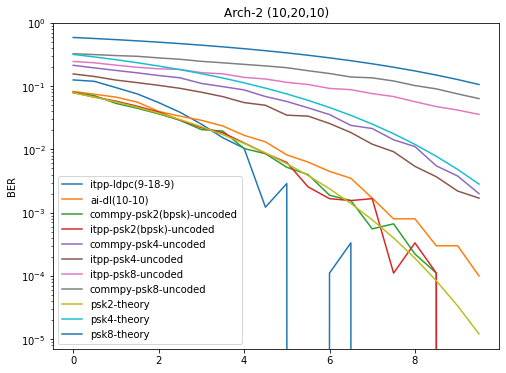

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(10-10)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

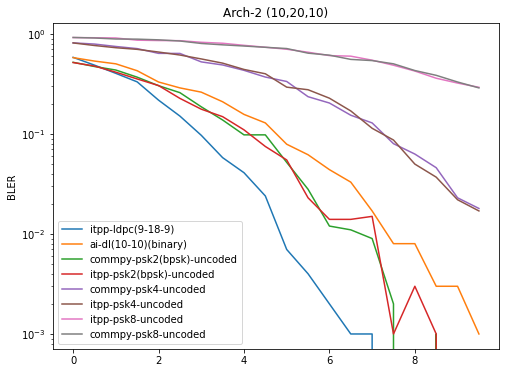

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor,'', label="ai-dl(10-10)(binary)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

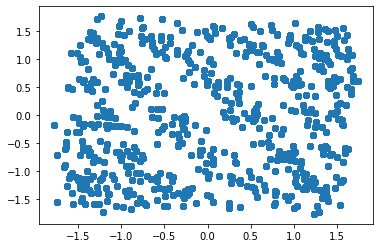

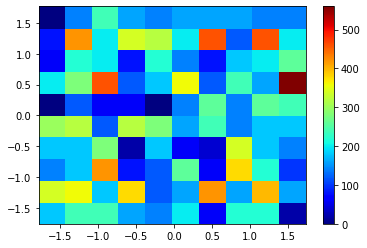

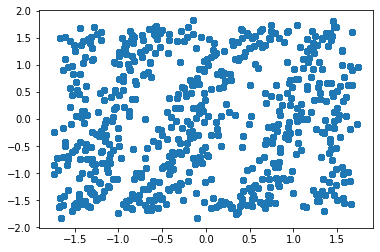

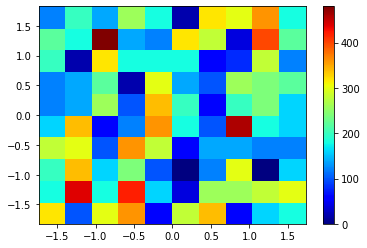

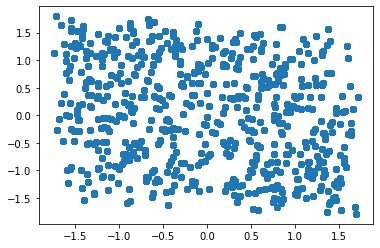

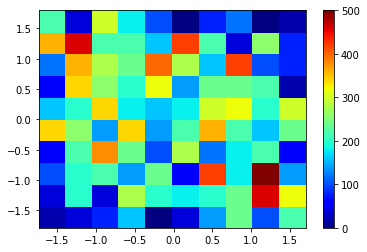

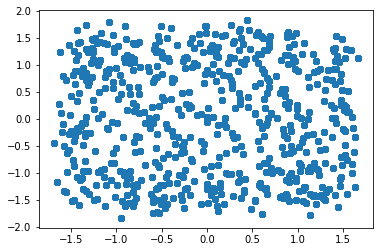

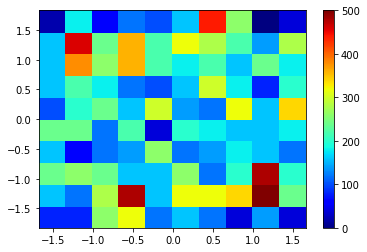

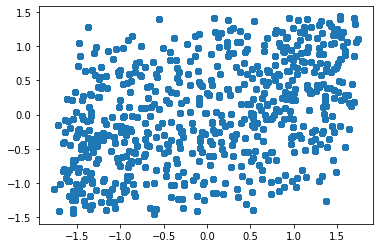

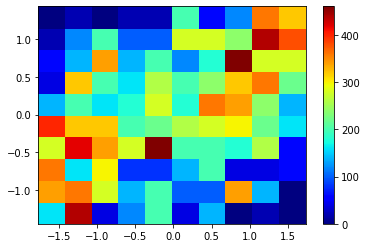

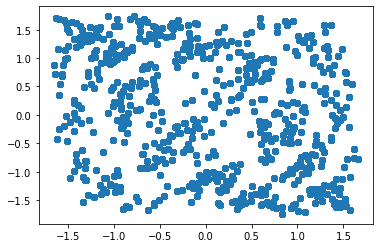

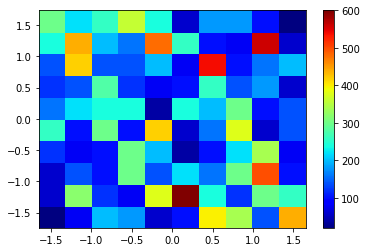

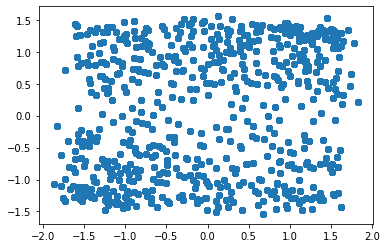

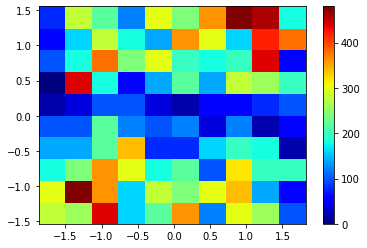

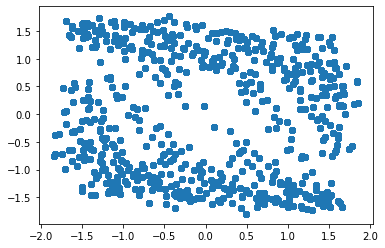

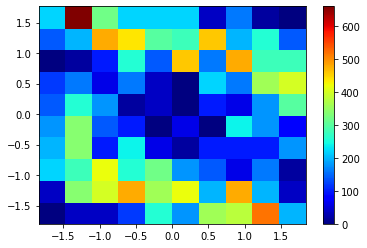

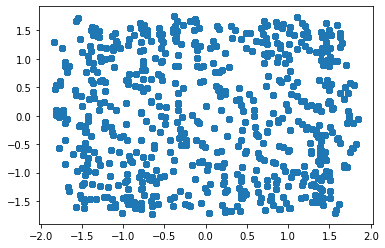

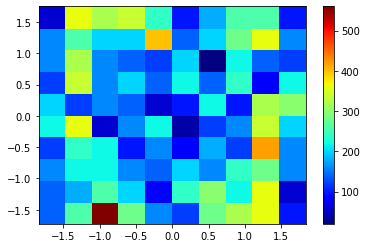

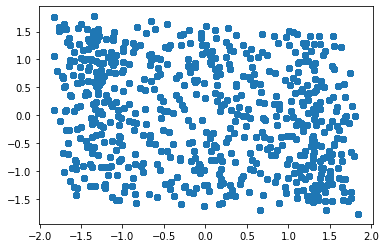

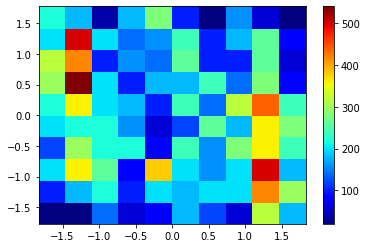

In [63]:

import matplotlib.pyplot as plt
channel_in_array = numpy.transpose(channel_in)

for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

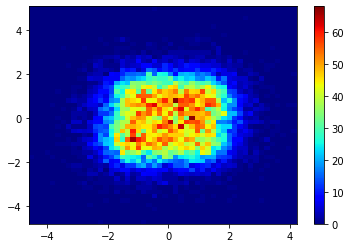

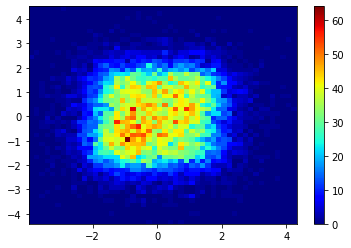

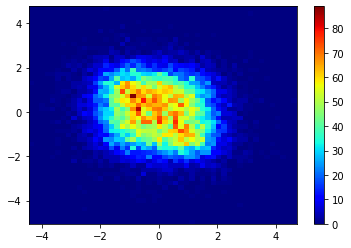

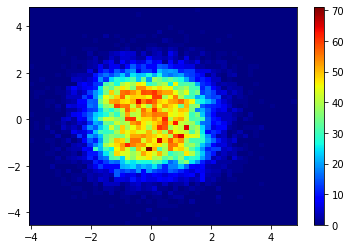

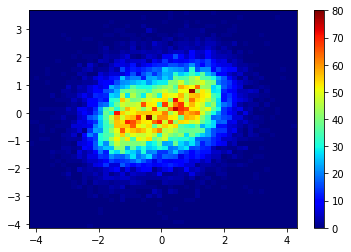

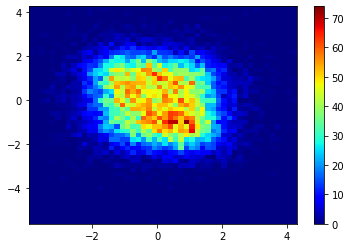

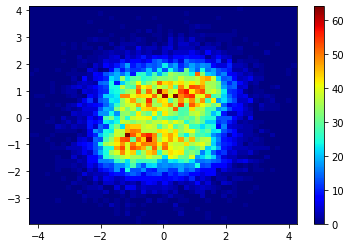

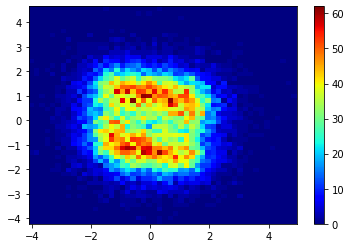

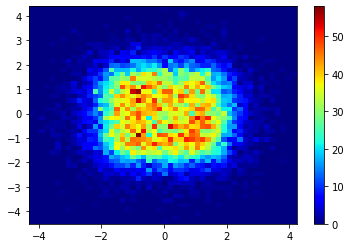

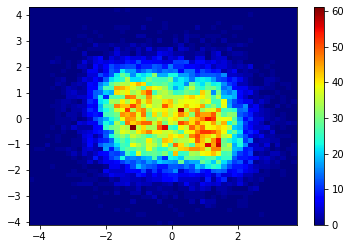

In [64]:
channel_out_array = numpy.transpose(channel_out)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

4.4690113


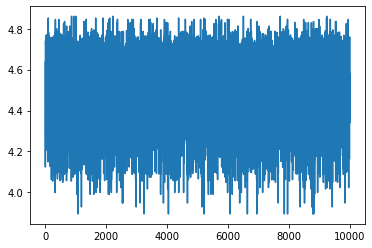

In [65]:
input_message_xx_float = training_input_message.astype("float32")
encoded_message = train_sess.run ([dl_encoder_output], feed_dict={input_message_x:input_message_xx_float})
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message[0]), axis=1))
plt.plot(x)
print (numpy.mean(x))

In [68]:
# ARCH 2 : 18-36-18
NUM_OF_INPUT_MESSAGE = 1000
channel_size = 10
input_message_length = 10

print ("input_message_length=", input_message_length, "channel_size", channel_size)

input_message_x = tf.placeholder("float32", [None, input_message_length], name="input_message_x")
awgn_noise_std_dev_x = tf.placeholder("float32", name ="awgn_noise_std_dev")
input_channel_x = tf.placeholder("float32", [None, 2 * channel_size], name="input_channel_x")

weights = {
  "encoder_l1" : tf.Variable (tf.random_uniform([input_message_length, 2 * channel_size], -1, 1), name="encoder_l1_weights"),
  "decoder_l1" : tf.Variable (tf.random_uniform([2 * channel_size, input_message_length], -1, 1), name="decoder_l1_weights"),
}

biases = {
  "encoder_l1" : tf.Variable (tf.random_uniform([2 * channel_size], -1,1), name="encoder_l1_bias"),
  "decoder_l1" : tf.Variable (tf.random_uniform([input_message_length], -1,1), name="decoder_l1_bias"),
}

def dl_encoder (x):
  layer_1 = tf.nn.tanh (tf.matmul(x, weights['encoder_l1']) + biases['encoder_l1'])
  #layer_2 = tf.nn.tanh (tf.matmul(layer_1, weights['encoder_l2']) + biases['encoder_l2'])
  #layer_2 = tf.round(layer_1)
  layer_2 =  layer_1 / tf.sqrt(tf.reduce_mean(tf.square(layer_1)))
  #layer_2 =  tf.nn.relu(layer_1)
  return layer_2

def dl_decoder (x):
  layer_2 = tf.nn.sigmoid (tf.matmul(x, weights['decoder_l1']) + biases['decoder_l1'])
  return layer_2

def awgn_layer(x):
  awgn_noise = tf.random.normal(tf.shape(x), stddev=awgn_noise_std_dev_x,  name="awgn_noise")
  awgn_channel_output = tf.add(x, awgn_noise, name ="x_and_noise")
  return awgn_channel_output


dl_encoder_output = dl_encoder(input_message_x)
dl_decoder_input = awgn_layer(dl_encoder_output)
#awgn_noise = tf.random.normal(tf.shape(dl_encoder_output), stddev=awgn_noise_std_dev,  name="awgn_noise")
#dl_decoder_input = tf.add(dl_encoder_output, awgn_noise, name ="x_and_noise")
dl_decoder_output = dl_decoder (dl_decoder_input)
dl_decoder_only_output = dl_decoder(input_channel_x)


#loss1 = tf.reduce_mean (-1 * (input_message_x*tf.log(dl_decoder_output) + (1 - input_message_x)*tf.log(1 - dl_decoder_output) ))
loss1 = tf.reduce_mean (tf.sqrt(tf.reduce_sum(tf.square(input_message_x-dl_decoder_output), axis=1)))
lr = tf.placeholder(dtype=tf.float32,shape=[])
opt = tf.train.AdamOptimizer(learning_rate=lr).minimize (loss1)


awgn_channel_input = tf.compat.v1.placeholder(tf.float64, [2*channel_size])
awgn_noise_std_dev = tf.placeholder(tf.float64)
awgn_noise = tf.random.normal(tf.shape(awgn_channel_input), stddev=awgn_noise_std_dev, dtype=tf.dtypes.float64)
awgn_channel_output = tf.add(awgn_channel_input, awgn_noise)

input_message_length= 10 channel_size 10


In [69]:
training_input_message = numpy.random.randint(2, size=(NUM_OF_INPUT_MESSAGE*10,input_message_length))
print (training_input_message)
print (len(training_input_message))

[[1 1 0 ... 1 1 0]
 [1 1 0 ... 0 1 1]
 [0 1 1 ... 1 0 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 0 0 0]
 [1 0 0 ... 0 1 1]]
10000


In [73]:
batch_size = 500


# Training
train_init = tf.global_variables_initializer ()
train_sess = tf.Session ()

epochs = 20
outer_ephocs = 1
num_of_batches = len(training_input_message) / batch_size
display_step = 400
print ("batch_size:", batch_size, "num_of_batcches:", num_of_batches)
train_sess.run(train_init)
l = 0
lrate = 0.01
i = 0
for oe in range(outer_ephocs):
  for snr in (numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)):
    sigma = 1.0*Snr2Sigma (snr)
    print ("Training for SNR=", snr, " sigma=", sigma) 
    for e in range(epochs):
      for j in range (int(num_of_batches)):
        i = i + 1
        k = e * epochs + j
        x_train_batch = training_input_message [j*batch_size:(j+1)*batch_size]
        x_train_batch_float = x_train_batch.astype("float32")
        _, l = train_sess.run ([opt, loss1], feed_dict={input_message_x:x_train_batch_float, awgn_noise_std_dev_x:sigma, lr:lrate})
        if (l < 0.5): lrate = 0.005
        if (l < 0.25): lrate = 0.00005
        if (l < 0.1): lrate = 0.000005
        if k % display_step == 0:
          print('Step %i: Minibatch Loss: %f' % (i, l))

batch_size: 500 num_of_batcches: 20.0
Training for SNR= 0.0  sigma= 1.0
Step 1: Minibatch Loss: 2.013224
Training for SNR= 0.5  sigma= 0.9440608762859234
Step 401: Minibatch Loss: 0.575611
Training for SNR= 1.0  sigma= 0.8912509381337456
Step 801: Minibatch Loss: 0.544021
Training for SNR= 1.5  sigma= 0.8413951416451951
Step 1201: Minibatch Loss: 0.440847
Training for SNR= 2.0  sigma= 0.7943282347242815
Step 1601: Minibatch Loss: 0.373189
Training for SNR= 2.5  sigma= 0.7498942093324559
Step 2001: Minibatch Loss: 0.328400
Training for SNR= 3.0  sigma= 0.7079457843841379
Step 2401: Minibatch Loss: 0.246053
Training for SNR= 3.5  sigma= 0.6683439175686147
Step 2801: Minibatch Loss: 0.177026
Training for SNR= 4.0  sigma= 0.6309573444801932
Step 3201: Minibatch Loss: 0.147510
Training for SNR= 4.5  sigma= 0.5956621435290105
Step 3601: Minibatch Loss: 0.113564
Training for SNR= 5.0  sigma= 0.5623413251903491
Step 4001: Minibatch Loss: 0.082695
Training for SNR= 5.5  sigma= 0.530884444230988

In [74]:
# Here I am using trained model
NUM_OF_INPUT_MESSAGE_BER = NUM_OF_INPUT_MESSAGE 
output_display_counter = NUM_OF_INPUT_MESSAGE/4
ber_per_iter_dl_tensor  = numpy.array(())
bler_per_iter_dl_tensor  = numpy.array(())
times_per_iter_dl_tensor = numpy.array(())

channel_in = []
channel_out = []
for snr in numpy.arange (0, 10, SNR_STEP_SIZE):
  total_bit_error = 0
  total_msg_error = 0
  total_time = 0
  current_time = time.time()
  sigma = Snr2Sigma (snr)
  for i in range (NUM_OF_INPUT_MESSAGE_BER):
    input_message_xx = training_input_message [i:i+1]
    input_message_xx_float = input_message_xx.astype("float32")
    encoded_message = train_sess.run ([dl_encoder_output], feed_dict={input_message_x:input_message_xx_float})
    #print (encoded_message[0][0])
    channel_in.append(encoded_message[0][0])
    #print (encoded_message[0][0])
    awgn_channel_output_message = train_sess.run ([awgn_channel_output], feed_dict={awgn_noise_std_dev:sigma, awgn_channel_input:encoded_message[0][0]})
    channel_out.append(awgn_channel_output_message[0]) 
    #print (awgn_channel_output_message[0])
    decoded_message = train_sess.run ([dl_decoder_only_output], feed_dict={input_channel_x:awgn_channel_output_message})
    #print ("input", input_message[i])
    decoded_message = numpy.around(decoded_message[0][0]).astype(int)
    #print ("output", decoded_message)
    diffc = abs(decoded_message-training_input_message[i]).sum()
    total_bit_error = total_bit_error + diffc
    if diffc != 0 :
      total_msg_error = total_msg_error + 1
    if (i+1) % output_display_counter == 0:
      total_time = timer_update(i, current_time,total_time, output_display_counter)
  bler = float(total_msg_error)/NUM_OF_INPUT_MESSAGE_BER
  ber = float(total_bit_error)/(NUM_OF_INPUT_MESSAGE_BER*input_message_length)
  print('SNR: {:04.3f}:\n -> BLER: {:03.4f} BER: {:03.4f}\n'.format(snr,bler,ber,total_time))
  ber_per_iter_dl_tensor=numpy.append(ber_per_iter_dl_tensor ,ber)
  bler_per_iter_dl_tensor=numpy.append(bler_per_iter_dl_tensor ,bler)

SNR: 0.000 - Iter: 250 - Last 250.0 iterations took 0.30s
SNR: 0.000 - Iter: 500 - Last 250.0 iterations took 0.57s
SNR: 0.000 - Iter: 750 - Last 250.0 iterations took 0.82s
SNR: 0.000 - Iter: 1000 - Last 250.0 iterations took 1.09s
SNR: 0.000:
 -> BLER: 0.5510 BER: 0.0762

SNR: 0.500 - Iter: 250 - Last 250.0 iterations took 0.27s
SNR: 0.500 - Iter: 500 - Last 250.0 iterations took 0.53s
SNR: 0.500 - Iter: 750 - Last 250.0 iterations took 0.78s
SNR: 0.500 - Iter: 1000 - Last 250.0 iterations took 1.05s
SNR: 0.500:
 -> BLER: 0.5030 BER: 0.0688

SNR: 1.000 - Iter: 250 - Last 250.0 iterations took 0.25s
SNR: 1.000 - Iter: 500 - Last 250.0 iterations took 0.51s
SNR: 1.000 - Iter: 750 - Last 250.0 iterations took 0.77s
SNR: 1.000 - Iter: 1000 - Last 250.0 iterations took 1.03s
SNR: 1.000:
 -> BLER: 0.4650 BER: 0.0586

SNR: 1.500 - Iter: 250 - Last 250.0 iterations took 0.26s
SNR: 1.500 - Iter: 500 - Last 250.0 iterations took 0.53s
SNR: 1.500 - Iter: 750 - Last 250.0 iterations took 0.79s
S

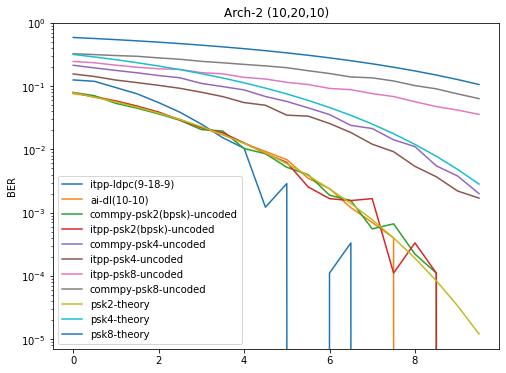

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,ber_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_dl_tensor,'', label="ai-dl(10-10)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,ber_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,PSK_2_BER_theory[0:20],'', label="psk2-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_4_BER_theory[0:20],'', label="psk4-theory") # plot BER vs SNR
ax1.semilogy(snrs,PSK_8_BER_theory[0:20],'', label="psk8-theory") # plot BER vs SNR
ax1.set_ylabel('BER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

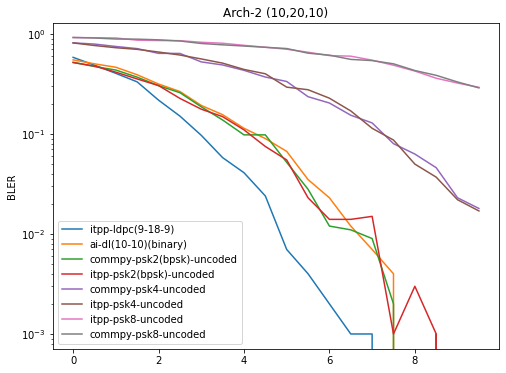

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
snrs = numpy.arange (SNR_BEGIN, SNR_END, SNR_STEP_SIZE)
fig, (ax1) = plt.subplots(1,1,figsize=(8,6))
ax1.semilogy(snrs,bler_per_iter_ldpc_itpp_psk_4,'', label="itpp-ldpc(9-18-9)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_dl_tensor,'', label="ai-dl(10-10)(binary)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_2,'', label="commpy-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_2,'', label="itpp-psk2(bpsk)-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_4,'', label="commpy-psk4-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_4,'', label="itpp-psk4-uncoded") # plot BER vs SNR
#ax1.semilogy(snrs,ber_per_iter_ham_itpp_psk_4,'', label="itpp-ham(7,4)(input=8,channel=7)") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_itpp_psk_8,'', label="itpp-psk8-uncoded") # plot BER vs SNR
ax1.semilogy(snrs,bler_per_iter_uncoded_commpy_psk_8,'', label="commpy-psk8-uncoded") # plot BER vs SNR
ax1.set_ylabel('BLER')
ax1.set_title('Arch-2 ({},{},{})'.format(input_message_length,2*input_message_length, channel_size))
plt.savefig('ldpc_ber_{}_{}.png'.format(2*channel_size,input_message_length))
plt.legend ()
plt.show()

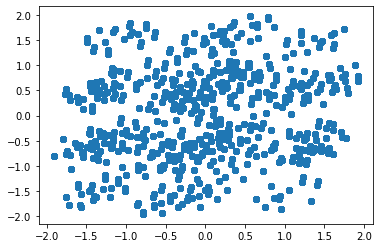

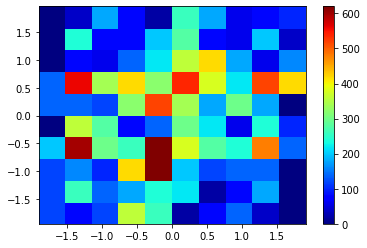

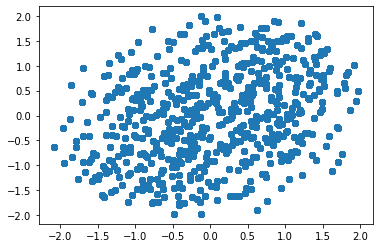

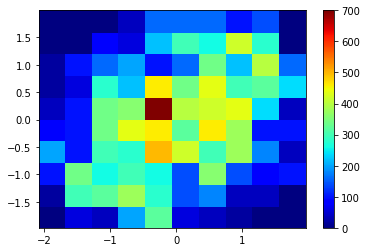

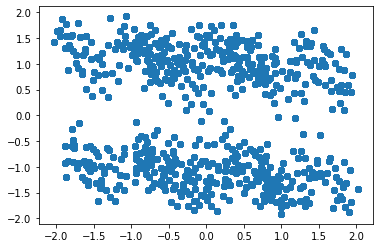

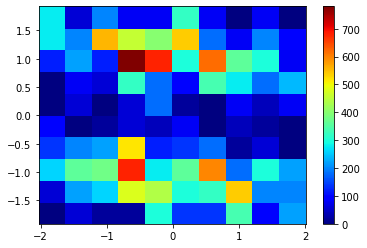

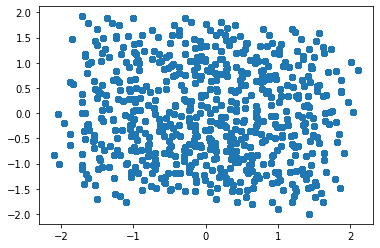

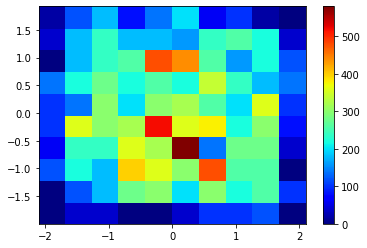

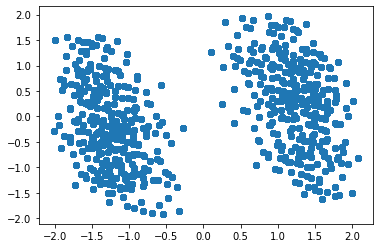

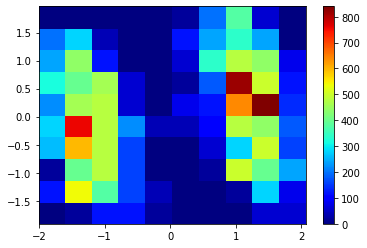

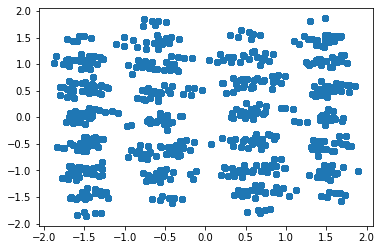

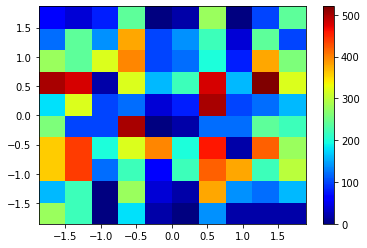

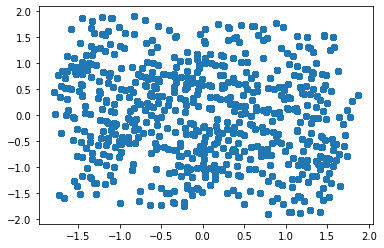

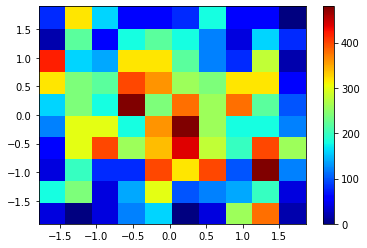

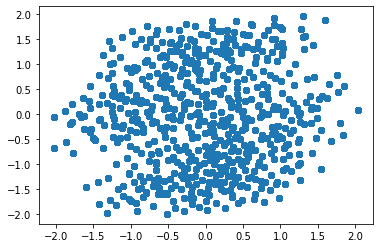

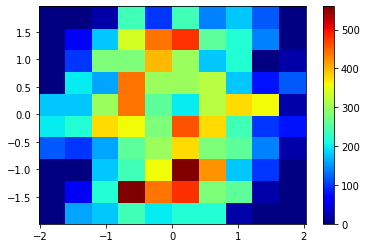

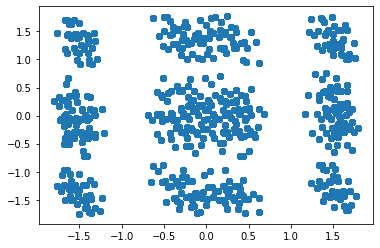

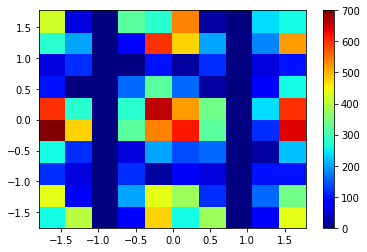

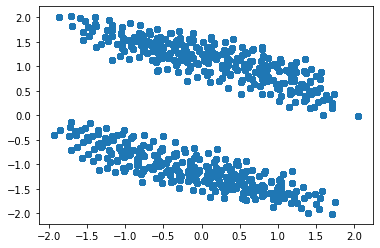

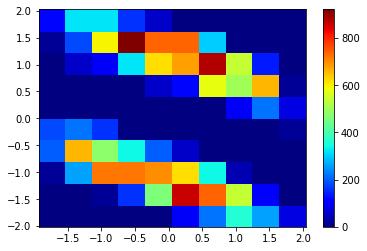

In [77]:
import matplotlib.pyplot as plt
channel_in_array = numpy.transpose(channel_in)

for i in range (int(channel_size)):
  plt.scatter(channel_in_array[i*2], channel_in_array[i*2+1])
  plt.show()
  plt.hist2d(channel_in_array[i*2], channel_in_array[i*2+1], cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

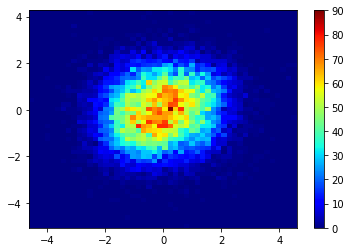

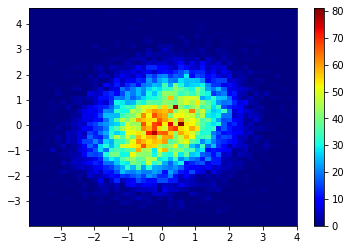

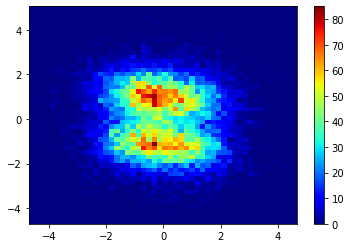

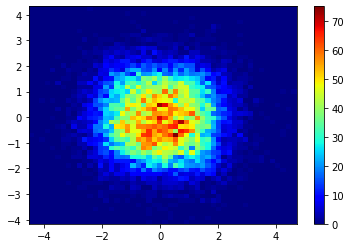

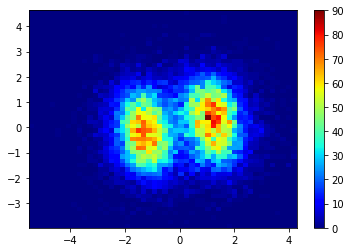

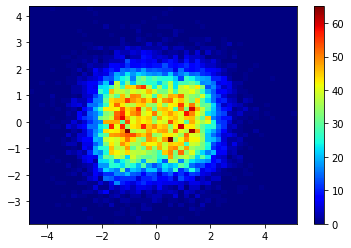

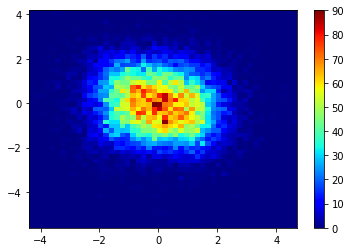

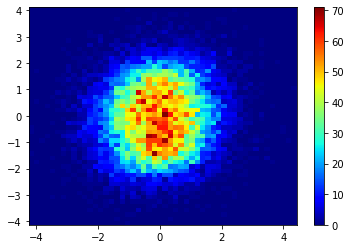

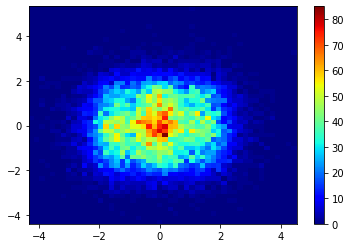

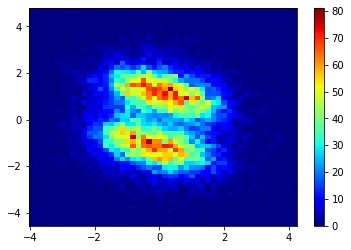

In [78]:
channel_out_array = numpy.transpose(channel_out)

for i in range (int(channel_size)):
  plt.hist2d(channel_out_array[2*i], channel_out_array[2*i+1], (50, 50), cmap=plt.cm.jet)
  plt.colorbar()
  plt.show()

4.47174


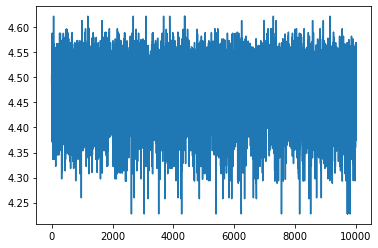

In [79]:
input_message_xx_float = training_input_message.astype("float32")
encoded_message = train_sess.run ([dl_encoder_output], feed_dict={input_message_x:input_message_xx_float})
x = numpy.sqrt(numpy.sum (numpy.square(encoded_message[0]), axis=1))
plt.plot(x)
print (numpy.mean(x))